In [20]:
import pandas as pd
pd.set_option("display.max_columns", 150)
import glob
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
#importing the data
csv_files = glob.glob('../data/trips/*.csv')


dataframes = []


for csv_file in csv_files:
    df = pd.read_csv(csv_file, low_memory=False)
    dataframes.append(df)

citibike = pd.concat(dataframes, ignore_index=True)


citibike  = citibike.drop(columns = 'Unnamed: 0') #dropping extra column
citibike = citibike.sort_values('date').reset_index(drop = True) #sorting the values by date and resetting index.

In [22]:
#changing columns to datetime.
citibike['date'] = pd.to_datetime(citibike['date'])
citibike['year'] = pd.to_datetime(citibike['date']).dt.year
citibike['month'] = pd.to_datetime(citibike['date']).dt.month

citibike['day_of_week'] = citibike['day_of_week'].astype(str) #changing the day of week column to string.

In [24]:
#creating a column that has the seasons.
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

citibike['season'] = citibike['date'].apply(get_season)

In [6]:
#checking the total amount of trips by day of week. 
citibike.groupby('day_of_week')['num_of_trips'].sum().sort_values(ascending = False)

day_of_week
2    10118289
5    10018821
1     9985986
4     9916249
3     9734578
0     9160499
6     8785583
Name: num_of_trips, dtype: int64

In [28]:
#checking the total amount of trips by season. 
citibike.groupby('season')['num_of_trips'].sum().sort_values(ascending = False)

season
Summer    22304081
Fall      20999058
Spring    14580654
Winter     9836212
Name: num_of_trips, dtype: int64

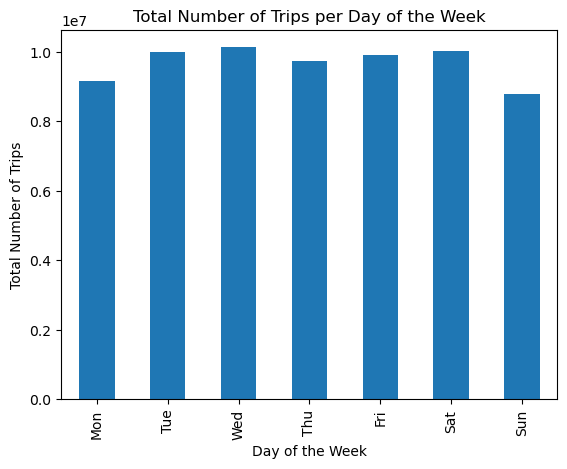

In [11]:
citibike.groupby('day_of_week')['num_of_trips'].sum().plot.bar()


plt.title('Total Number of Trips per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Trips')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])


plt.show()

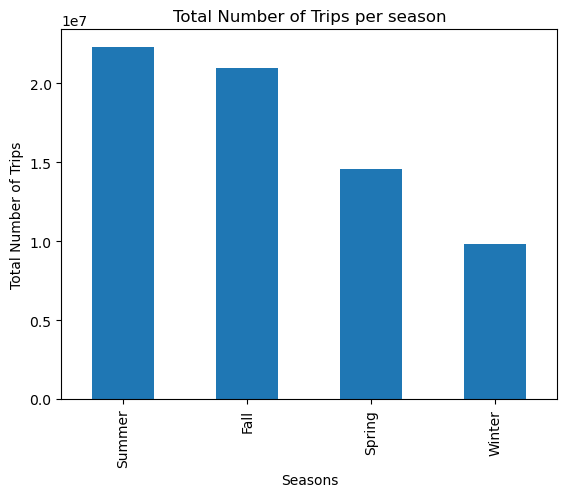

In [32]:
citibike.groupby('season')['num_of_trips'].sum().sort_values(ascending = False).plot.bar()


plt.title('Total Number of Trips per season')
plt.xlabel('Seasons')
plt.ylabel('Total Number of Trips')


plt.show()

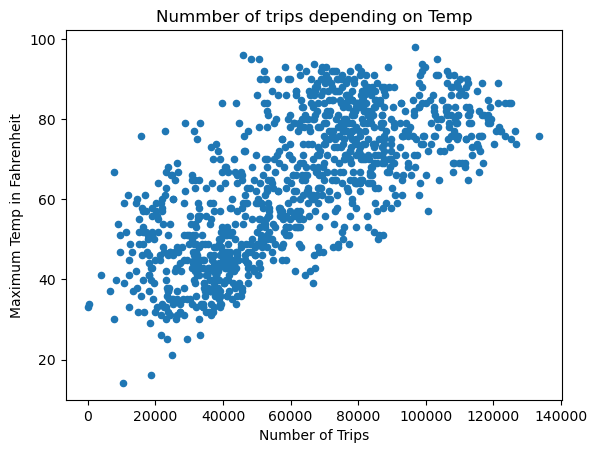

In [35]:
#plotting amount of trips against the max temp.
citibike.plot.scatter(x = 'num_of_trips', y = 'tmax')

plt.title('Nummber of trips depending on Temp')
plt.xlabel('Number of Trips')
plt.ylabel('Maximum Temp in Fahrenheit')

plt.show()

In [9]:
#is the tempertaure and num of trips correlated.
citibike[['num_of_trips', 'tmax']].corr()

,num_of_trips,tmax
num_of_trips,1.000000,0.705041
tmax,0.705041,1.000000


linear Regression Time 

In [13]:
lm = smf.ols('num_of_trips ~ tmax', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     1080.
Date:                Wed, 29 May 2024   Prob (F-statistic):          2.52e-165
Time:                        21:23:32   Log-Likelihood:                -12389.
No. Observations:                1095   AIC:                         2.478e+04
Df Residuals:                    1093   BIC:                         2.479e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.028e+04   2275.070     -4.521      0.000   -1.47e+04   -5820.870
tmax        1133.6926     34.492     32.868      0.000    1066.014    1201.371
==============================================================================
Omnibus:                        0.215   Durbin-Watson:                   0.661
Prob(Omnibus):                  0.898   Jarque-Bera (JB):                0.288
Skew:                           0.020   Prob(JB):                        0.866
Kurtosis:                       2.932   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

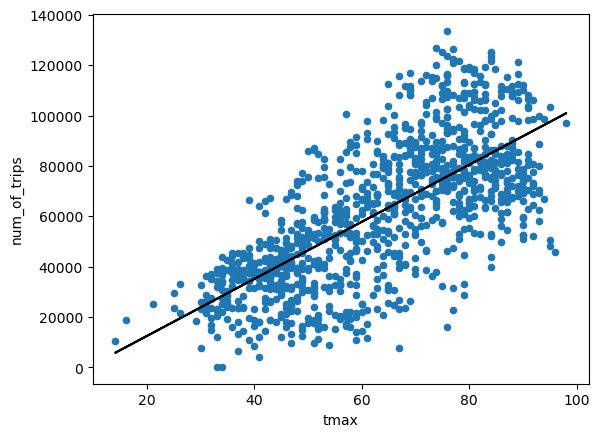

In [14]:
citibike.plot(x = 'tmax', y = 'num_of_trips', kind = 'scatter')
plt.plot(citibike['tmax'], lm.fittedvalues, color = 'black');

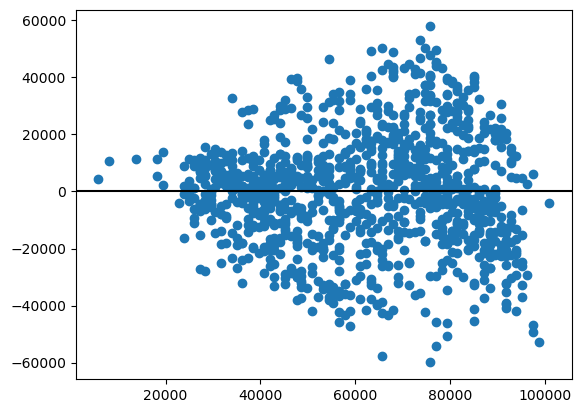

In [15]:
plt.scatter(lm.fittedvalues, lm.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);

In [52]:
lm_quad = smf.ols('num_of_trips ~ tmax + I(tmax**2)', data = citibike).fit()
lm_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     551.0
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.55e-166
Time:                        21:21:22   Log-Likelihood:                -12383.
No. Observations:                1095   AIC:                         2.477e+04
Df Residuals:                    1092   BIC:                         2.479e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.481e+04   7602.613     -4.579      0.000   -4.97e+04   -1.99e+04
tmax          1992.0563    256.298      7.772      0.000    1489.164    2494.949
I(tmax ** 2)    -6.9151      2.046     -3.380      0.001     -10.930      -2.900
==============================================================================
Omnibus:                        0.435   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.805   Jarque-Bera (JB):                0.508
Skew:                          -0.039   Prob(JB):                        0.776
Kurtosis:                       2.928   Cond. No.                     6.20e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

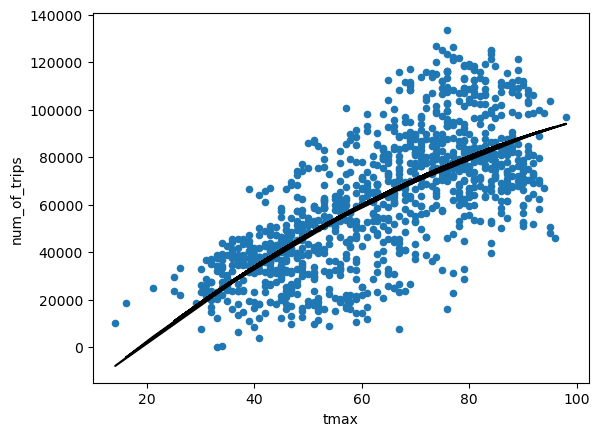

In [54]:
citibike.plot(x = 'tmax', y = 'num_of_trips', kind = 'scatter')
plt.plot(citibike['tmax'], lm_quad.fittedvalues, color = 'black');

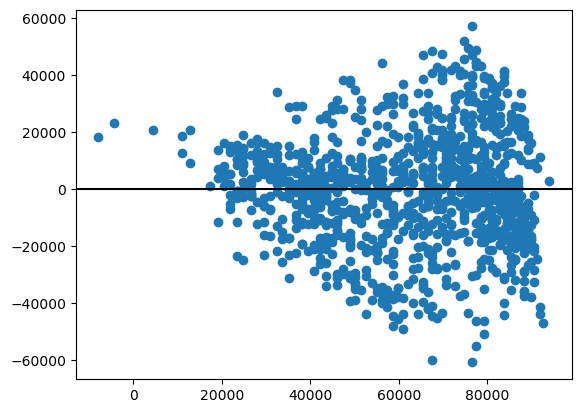

In [55]:
plt.scatter(lm_quad.fittedvalues, lm_quad.resid)
xmin, xmax = plt.xlim()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'black')
plt.xlim(xmin, xmax);

In [47]:
citibike.columns

Index(['date', 'num_of_trips', 'holiday', 'prcp', 'snow', 'tmax', 'tmin',
       'median_trip_duration', 'mean_trip_duration', 'day_of_week', 'year',
       'month', 'season'],
      dtype='object')

In [51]:
lm = smf.ols('num_of_trips ~ + season + day_of_week + tmax + I(tmax**2)', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     136.3
Date:                Thu, 30 May 2024   Prob (F-statistic):          1.57e-195
Time:                        21:19:17   Log-Likelihood:                -12290.
No. Observations:                1095   AIC:                         2.460e+04
Df Residuals:                    1083   BIC:                         2.466e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -6262.8644   8810.875     -0.711      0.477   -2.36e+04     1.1e+04
season[T.Spring] -1.955e+04   1572.711    -12.430      0.000   -2.26e+04   -1.65e+04
season[T.Summer] -1.437e+04   2052.254     -7.004      0.000   -1.84e+04   -1.03e+04
season[T.Winter] -1.581e+04   2037.901     -7.758      0.000   -1.98e+04   -1.18e+04
day_of_week[T.1]  5179.9548   2063.974      2.510      0.012    1130.114    9229.796
day_of_week[T.2]  5882.6710   2059.586      2.856      0.004    1841.440    9923.902
day_of_week[T.3]  3383.8036   2059.807      1.643      0.101    -657.861    7425.468
day_of_week[T.4]  4407.0985   2059.677      2.140      0.033     365.689    8448.508
day_of_week[T.5]  5713.6723   2062.709      2.770      0.006    1666.313    9761.031
day_of_week[T.6] -2512.3367   2063.496     -1.218      0.224   -6561.239    1536.566
tmax              1388.0417    279.159      4.972      0.000     840.288    1935.795
I(tmax ** 2)        -2.5077      2.268     -1.106      0.269      -6.957       1.942
==============================================================================
Omnibus:                        1.492   Durbin-Watson:                   0.753
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.425
Skew:                          -0.087   Prob(JB):                        0.490
Kurtosis:                       3.028   Cond. No.                     7.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
lm = smf.ols('num_of_trips ~ + season + day_of_week + tmax  + holiday + prcp', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     157.0
Date:                Thu, 30 May 2024   Prob (F-statistic):          4.96e-227
Time:                        20:43:00   Log-Likelihood:                -12213.
No. Observations:                1095   AIC:                         2.445e+04
Df Residuals:                    1082   BIC:                         2.452e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5472.0134   3747.032      1.460      0.144   -1880.258    1.28e+04
season[T.Spring] -1.999e+04   1470.113    -13.600      0.000   -2.29e+04   -1.71e+04
season[T.Summer] -1.516e+04   1718.634     -8.819      0.000   -1.85e+04   -1.18e+04
season[T.Winter] -1.638e+04   1855.494     -8.827      0.000      -2e+04   -1.27e+04
day_of_week[T.1]  3313.9518   1952.684      1.697      0.090    -517.525    7145.429
day_of_week[T.2]  5007.2966   1942.679      2.578      0.010    1195.453    8819.141
day_of_week[T.3]  2716.8135   1937.253      1.402      0.161   -1084.384    6518.011
day_of_week[T.4]  3522.3994   1934.705      1.821      0.069    -273.799    7318.598
day_of_week[T.5]  3815.1317   1955.764      1.951      0.051     -22.387    7652.651
day_of_week[T.6] -4167.5430   1955.506     -2.131      0.033   -8004.557    -330.529
holiday[T.True]  -1.084e+04   3137.735     -3.455      0.001    -1.7e+04   -4683.027
tmax              1096.7426     51.336     21.364      0.000     996.013    1197.472
prcp               -60.6912      4.929    -12.314      0.000     -70.362     -51.020
==============================================================================
Omnibus:                       15.825   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.053
Skew:                           0.224   Prob(JB):                     0.000120
Kurtosis:                       3.441   Cond. No.                         990.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
lr_reduced = smf.ols('num_of_trips ~ + season + tmax + day_of_week', data = citibike).fit()
lr_full = smf.ols('num_of_trips ~ + season + day_of_week + tmax + holiday', data = citibike).fit()

sm.stats.anova_lm(lr_reduced, lr_full)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1084.0,3.597967e+11,0.0,NaN,NaN,NaN
1,1083.0,3.564080e+11,1.0,3.388714e+09,10.297124,0.001371


In [56]:
lr_reduced = smf.ols('num_of_trips ~ tmax', data = citibike).fit()
lr_full = smf.ols('num_of_trips ~ + tmax + I(tmax**2)', data = citibike).fit()

sm.stats.anova_lm(lr_reduced, lr_full)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1093.0,4.309407e+11,0.0,NaN,NaN,NaN
1,1092.0,4.264801e+11,1.0,4.460562e+09,11.421246,0.000752


In [57]:
lr_reduced = smf.ols('num_of_trips ~ day_of_week + holiday + tmax ', data = citibike).fit()
lr_full = smf.ols('num_of_trips ~ + season + day_of_week + tmax  + holiday', data = citibike).fit()

sm.stats.anova_lm(lr_reduced, lr_full)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1086.0,4.194779e+11,0.0,NaN,NaN,NaN
1,1083.0,3.564080e+11,3.0,6.306985e+10,63.882445,4.931254e-38


In [17]:
citibike.head()

,date,num_of_trips,holiday,prcp,snow,tmax,tmin,median_trip_duration,mean_trip_duration,day_of_week,year,month,season
0,2019-01-01,21962,True,15,0.0,57.92,39.02,663.0,1175.93,1,2019,1,Winter
1,2019-01-02,37797,False,0,0.0,39.92,35.06,548.0,780.93,2,2019,1,Winter
2,2019-01-03,41676,False,0,0.0,44.06,37.04,533.0,769.52,3,2019,1,Winter
3,2019-01-04,43922,False,0,0.0,46.94,35.06,535.0,778.15,4,2019,1,Winter
4,2019-01-05,17432,False,127,0.0,46.94,41.00,476.0,811.47,5,2019,1,Winter


In [18]:
lm = smf.ols('num_of_trips ~ + season + day_of_week + tmax  + holiday + prcp', data = citibike).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           num_of_trips   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 29 May 2024   Prob (F-statistic):          4.96e-227
Time:                        21:36:05   Log-Likelihood:                -12213.
No. Observations:                1095   AIC:                         2.445e+04
Df Residuals:                    1082   BIC:                         2.452e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5472.0134   3747.032      1.460      0.144   -1880.258    1.28e+04
season[T.Spring] -1.999e+04   1470.113    -13.600      0.000   -2.29e+04   -1.71e+04
season[T.Summer] -1.516e+04   1718.634     -8.819      0.000   -1.85e+04   -1.18e+04
season[T.Winter] -1.638e+04   1855.494     -8.827      0.000      -2e+04   -1.27e+04
day_of_week[T.1]  3313.9518   1952.684      1.697      0.090    -517.525    7145.429
day_of_week[T.2]  5007.2966   1942.679      2.578      0.010    1195.453    8819.141
day_of_week[T.3]  2716.8135   1937.253      1.402      0.161   -1084.384    6518.011
day_of_week[T.4]  3522.3994   1934.705      1.821      0.069    -273.799    7318.598
day_of_week[T.5]  3815.1317   1955.764      1.951      0.051     -22.387    7652.651
day_of_week[T.6] -4167.5430   1955.506     -2.131      0.033   -8004.557    -330.529
holiday[T.True]  -1.084e+04   3137.735     -3.455      0.001    -1.7e+04   -4683.027
tmax              1096.7426     51.336     21.364      0.000     996.013    1197.472
prcp               -60.6912      4.929    -12.314      0.000     -70.362     -51.020
==============================================================================
Omnibus:                       15.825   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.053
Skew:                           0.224   Prob(JB):                     0.000120
Kurtosis:                       3.441   Cond. No.                         990.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
 #citibike.to_csv('../data/citibike_vis.csv')